In [195]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import itertools

sns.set()

In [196]:
groups = [[360,359,358], [357, 356, 355], [354, 353, 352], [341, 340, 339], [334, 333, 332], [300, 299, 298], [202, 201, 200], [162, 161, 160], [165, 164,163]]
names = ["Active Bandit Learning Exp Decay", "Active Bandit Learning", "Active Bandit Learning Smaller Batch Size", "Uniform Sampling Smaller Batch Size", "Uniform Sampling", "Full Exploration", "Bucketed Curriculum Learning", "Remove Unrecognized", "Active Learning" ]

In [197]:
from pymongo import MongoClient
import pprint

client = MongoClient()
db = client.sacred

metrics = db.metrics
runs = db.runs

exp_list = list(itertools.chain.from_iterable(groups))
results = {}
for exp in exp_list:
    res = metrics.find({"run_id": exp})
    results[exp] = dict()
    for r in res:
        results[exp][r['name']] = r['values']



In [198]:
import seaborn as sns

In [10]:
easy_to_hard = results[180]

In [ ]:
print()

Text(0.5, 1.0, 'Simple Curriculum')

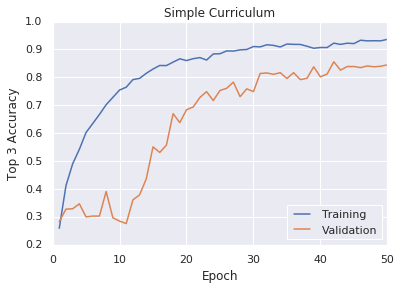

In [199]:
plt.plot(list(range(1, 51)), easy_to_hard["top_3_accuracy"], label='Training')
plt.plot(list(range(1, 51)), easy_to_hard["val_top_3_accuracy"], label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Top 3 Accuracy")
plt.legend(loc=4)
plt.title("Simple Curriculum")

In [200]:
def errorfill(x, y, ymin, ymax, name, color=None, alpha_fill=0.1, ax=None):
    ax = ax if ax is not None else plt.gca()
    if color is None:
        color = next(ax._get_lines.prop_cycler)["color"]
    ax.plot(x, y, color=color, label=name)
    ax.fill_between(x, ymax, ymin, color=color, alpha=alpha_fill)

(0.2980392156862745, 0.4470588235294118, 0.6901960784313725)


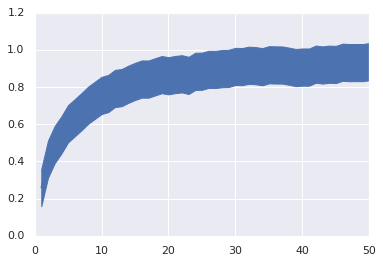

In [55]:
errorfill(list(range(1, 51)), np.array(easy_to_hard["top_3_accuracy"]), np.array(easy_to_hard["top_3_accuracy"])-0.1, np.array(easy_to_hard["top_3_accuracy"])+0.1)

In [201]:
groups = [[360,359,358], [357, 356, 355], [354, 353, 352], [341, 340, 339], [334, 333, 332], [300, 299, 298], [202, 201, 200], [162, 161, 160], [165, 164,163]]
names = ["Active Bandit Learning Exp Decay", "Active Bandit Learning", "Active Bandit Learning Smaller Batch Size", "Uniform Sampling Smaller Batch Size", "Uniform Sampling", "Full Exploration", "Bucketed Curriculum Learning", "Remove Unrecognized", "Active Learning" ]

In [220]:
names_and_groups = list(zip(names, groups))

In [217]:
names_and_groups_1 = [('Active Bandit Learning', [357, 356, 355]),
 ('Uniform Sampling', [334, 333, 332]),
 ('Bucketed Curriculum Learning', [202, 201, 200]),
 ('Simple Curriculum Learning', [165, 164, 163])]

In [218]:
names_and_groups_4 = [('Full Exploration', [300, 299, 298]),  ('Uniform Sampling', [334, 333, 332])]

In [205]:
names_and_groups_2 = [('Active Bandit Learning Exp Decay', [360, 359, 358]),
 ('Active Bandit Learning', [357, 356, 355])]

In [206]:
names_and_groups_3 = [('Active Bandit Learning', [354, 353, 352]),
 ('Uniform Sampling', [341, 340, 339])]

In [222]:
plots = [names_and_groups_1,
         names_and_groups_2,
         names_and_groups_3, 
         names_and_groups_4] 
plot_titles = ["Method Evaluations", "Evaluation of Exp Decay", "Method Comparison on Reduced Batch Size", "Harms of Taking Batches From Clusters"] 


In [72]:
print(len(groups))
print(len(names))


9
9


In [ ]:
  \item Worst Class Re-weighting
  \item Simple Curriculum Learning
  \item Bucketed Curriculum Learning \cite{palamuttamcs}
  \item Active Bandit Learning \cite{graves1704automated}

In [214]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

In [119]:
name_accur = [] 

Active Bandit Learning
0.8946666666666667
0.005734883511361756
Uniform Sampling
0.8983333271741868
0.0037712228760224307
Bucketed Curriculum Learning
0.8503333404858907
0.025720729324771714
Simple Curriculum Learning
0.8809999877214431
0.023366640426982502


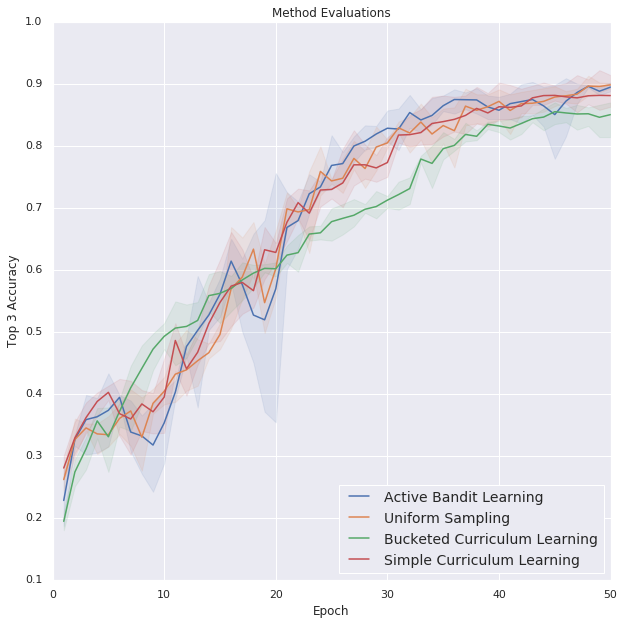

Active Bandit Learning Exp Decay
0.8926666666666666
0.0024944382578492965
Active Bandit Learning
0.8946666666666667
0.005734883511361756


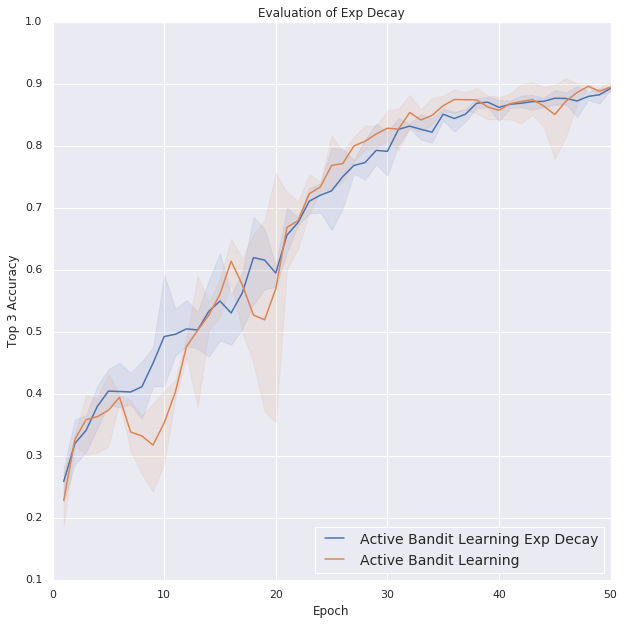

Active Bandit Learning
0.9366666666666665
0.0049888765156985435
Uniform Sampling
0.9139999936024349
0.00454606086285102


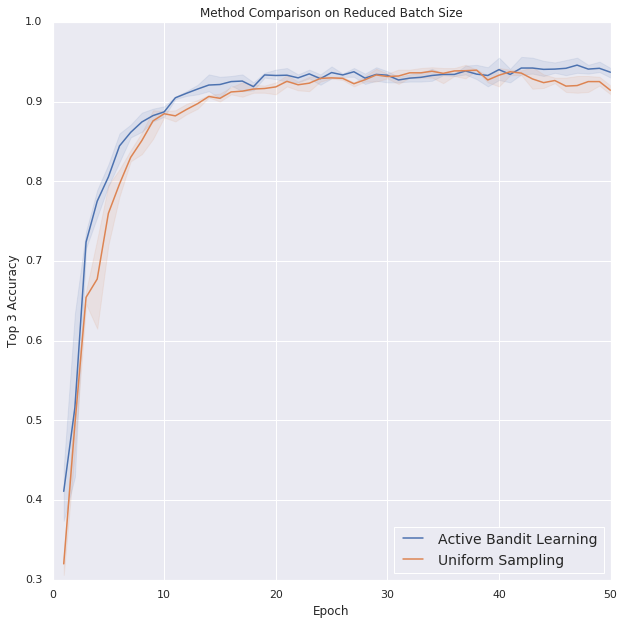

Full Exploration
0.8366666666666668
0.033993463423951875
Uniform Sampling
0.8983333271741868
0.0037712228760224307


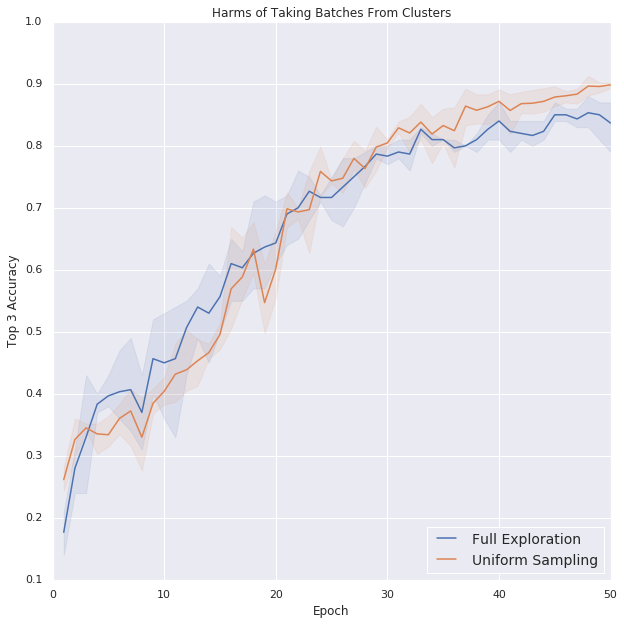

In [223]:
for plot_title, name_group in zip(plot_titles, plots):
    for name, group in name_group: 
        accuracies = np.array([results[elem]["val_top_3_accuracy"] for elem in group])
        mean = np.mean(accuracies, axis=0)
        print(name)
        print(mean[-1])
        print(np.std(accuracies, axis=0)[-1])
        name_accur.append((name, mean[-1]))
        
        max_val = np.max(accuracies, axis=0)
        min_val = np.min(accuracies, axis=0)
        errorfill(list(range(1, 51)), mean, min_val, max_val, name)
    plt.xlabel("Epoch")
    plt.ylabel("Top 3 Accuracy")
    plt.legend(loc=4, prop={'size': 14})
    plt.title(plot_title)
    plt.show()

In [121]:
name_accur

[('Active Bandit Learning', 0.8946666666666667),
 ('Uniform Sampling', 0.8983333271741868),
 ('Bucketed Curriculum Learning', 0.8503333404858907),
 ('Active Learning', 0.8809999877214431),
 ('Active Bandit Learning Exp Decay', 0.8926666666666666),
 ('Active Bandit Learning', 0.8946666666666667),
 ('Active Bandit Learning', 0.9366666666666665),
 ('Uniform Sampling', 0.9139999936024349),
 ('Full Exploration', 0.8366666666666668),
 ('Uniform Sampling', 0.8983333271741868)]

In [176]:
first_table = [("Simple Curriculum Learning", easy_to_hard["val_top_3_accuracy"][-1]),
               ('Uniform Sampling', 0.8983333271741868),
 ('Bucketed Curriculum Learning', 0.8503333404858907),
 ('Active Learning', 0.8809999877214431),
 ('Active Bandit Learning Exp Decay', 0.8926666666666666),
 ('Active Bandit Learning', 0.8946666666666667),
 ('Full Exploration', 0.8366666666666668)]

In [170]:
second_table = [('Active Bandit Learning', 0.9366666666666665),
 ('Uniform Sampling', 0.9139999936024349)]

In [175]:
df

,Top 3 Accuracy
Simple Curriculum Learning,"[0.28300000667572023, 0.3280000060796738, 0.32..."
Uniform Sampling,0.898333
Bucketed Curriculum Learning,0.850333
Active Learning,0.881
Active Bandit Learning Exp Decay,0.892667
Active Bandit Learning,0.894667
Full Exploration,0.836667


In [180]:
df = pd.DataFrame(first_table)
df.index = df[0]
df.index.name = "Method"
del df.index.name
del df[0]
df.rename(columns={1:"Top 3 Accuracy"}, inplace=True)
df.sort_values("Top 3 Accuracy", ascending=False, inplace=True)

In [183]:
print(df.to_latex())

\begin{tabular}{lr}
\toprule
{} &  Top 3 Accuracy \\
\midrule
Uniform Sampling                 &        0.898333 \\
Active Bandit Learning           &        0.894667 \\
Active Bandit Learning Exp Decay &        0.892667 \\
Active Learning                  &        0.881000 \\
Bucketed Curriculum Learning     &        0.850333 \\
Simple Curriculum Learning       &        0.845000 \\
Full Exploration                 &        0.836667 \\
\bottomrule
\end{tabular}



In [184]:
def convertToLaTeX(df, alignment="c"):
    """
    Convert a pandas dataframe to a LaTeX tabular.
    Prints labels in bold, does not use math mode
    """
    numColumns = df.shape[1]
    numRows = df.shape[0]
    output = io.StringIO()
    colFormat = ("%s|%s" % (alignment, alignment * numColumns))
    #Write header
    output.write("\\begin{tabular}{%s}\n" % colFormat)
    columnLabels = ["\\textbf{%s}" % label for label in df.columns]
    output.write("& %s\\\\\\hline\n" % " & ".join(columnLabels))
    #Write data lines
    for i in range(numRows):
        output.write("\\textbf{%s} & %s\\\\\n"
                     % (df.index[i], " & ".join([str(val) for val in df.ix[i]])))
    #Write footer
    output.write("\\end{tabular}")
    return output.getvalue()

In [186]:
import io

In [191]:
print(convertToLaTeX(df))

\begin{tabular}{c|c}
& \textbf{Top 3 Accuracy}\\\hline
\textbf{Active Bandit Learning} & 0.9366666666666665\\
\textbf{Uniform Sampling} & 0.9139999936024349\\
\end{tabular}


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [190]:
df = pd.DataFrame(second_table)
df.index = df[0]
df.index.name = "Method"
del df.index.name
del df[0]
df.rename(columns={1:"Top 3 Accuracy"}, inplace=True)
df.sort_values("Top 3 Accuracy", ascending=False,inplace=True)

KeyError: 0

In [161]:
df

,1
Uniform Sampling,0.898333
Bucketed Curriculum Learning,0.850333
Active Learning,0.881000
Active Bandit Learning Exp Decay,0.892667
Active Bandit Learning,0.894667
Full Exploration,0.836667


In [150]:
df

,1
Method,
Uniform Sampling,0.898333
Bucketed Curriculum Learning,0.850333
Active Learning,0.881000
Active Bandit Learning Exp Decay,0.892667
Active Bandit Learning,0.894667
Full Exploration,0.836667


In [132]:
df

,1
0,
Uniform Sampling,0.898333
Bucketed Curriculum Learning,0.850333
Active Learning,0.881000
Active Bandit Learning Exp Decay,0.892667
Active Bandit Learning,0.894667
Full Exploration,0.836667


In [122]:
second_tables = [('Active Bandit Learning', 0.9366666666666665),
                 ('Uniform Sampling', 0.9139999936024349)]

In [56]:
mean

array([0.279     , 0.33100001, 0.36300001, 0.36933334, 0.364     ,
       0.36300001, 0.36233333, 0.40133333, 0.39300001, 0.405     ,
       0.47300001, 0.482     , 0.52033334, 0.55633333, 0.574     ,
       0.58033334, 0.59966668, 0.63533334, 0.66200001, 0.647     ,
       0.67433334, 0.66066668, 0.62133334, 0.70466666, 0.78766666,
       0.78833334, 0.79833333, 0.819     , 0.823     , 0.83233333,
       0.83766667, 0.83766666, 0.83799999, 0.83533333, 0.85566666,
       0.86499999, 0.856     , 0.86133334, 0.85433333, 0.86933334,
       0.88200001, 0.88433333, 0.87333333, 0.88299999, 0.878     ,
       0.89366666, 0.88633334, 0.9       , 0.907     , 0.9       ])

In [57]:
min_val

array([0.33      , 0.36500001, 0.389     , 0.397     , 0.44600001,
       0.46800001, 0.494     , 0.511     , 0.52400002, 0.51900001,
       0.56600002, 0.60999999, 0.632     , 0.59999999, 0.67600002,
       0.68100001, 0.634     , 0.708     , 0.73500002, 0.706     ,
       0.77      , 0.72600002, 0.70000002, 0.77399998, 0.80499999,
       0.82700001, 0.804     , 0.833     , 0.84000001, 0.84299999,
       0.84800002, 0.84499999, 0.87499999, 0.853     , 0.87499998,
       0.88599999, 0.87999999, 0.89000001, 0.87899998, 0.897     ,
       0.89200001, 0.901     , 0.89099999, 0.89700001, 0.88999999,
       0.89699998, 0.88800001, 0.914     , 0.92000001, 0.91299999])